<a href="https://colab.research.google.com/github/monjar/AI-Assignments/blob/master/Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U scikit-learn
from sklearn.datasets import load_iris

iris = load_iris()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.10 (default, Nov 14 2022, 12:59:47)  [GCC 9.4.0]
executable: /usr/bin/python3
   machine: Linux-5.10.147+-x86_64-with-glibc2.29

Python dependencies:
      sklearn: 1.2.1
          pip: 22.0.4
   setuptools: 57.4.0
        numpy: 1.21.6
        scipy: 1.7.3
       Cython: 0.29.33
       pandas: 1.3.5
   matplotlib: 3.2.2
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
        version: 0.3.17
threading_layer: pthreads
   architecture: Haswell
    num_threads: 2

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /usr/local/lib/python3.8/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
        version: None
    num_threads: 2

       user_api: blas
   internal_api: openblas
         prefix: libopenblas


**# Exercise 1**

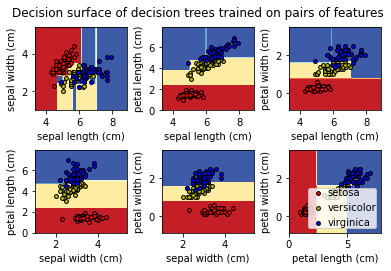

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")


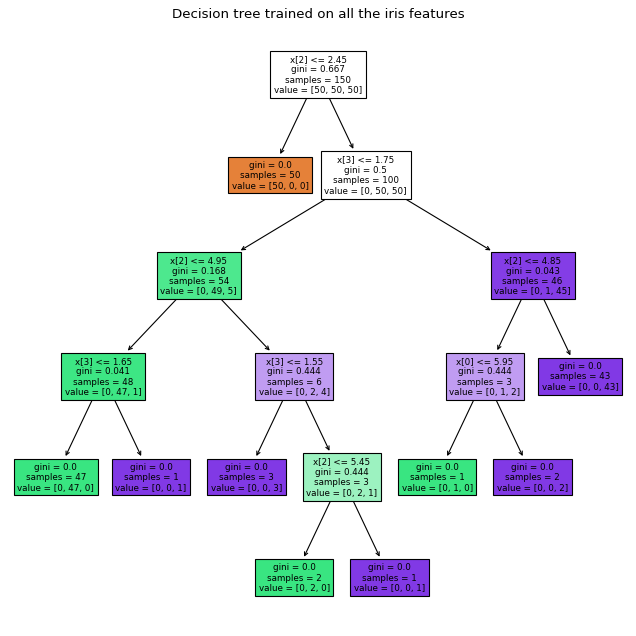

In [6]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10), dpi=80)
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

**# Ex 2:**

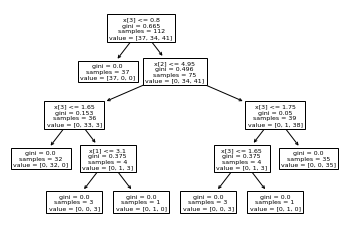

Train solit percentage: 74.66666666666667


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import tree

x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
tree.plot_tree(clf)
plt.show()
print(f"Train solit percentage: {y_train.shape[0] / (y_test.shape[0] + y_train.shape[0]) * 100}")

# **Ex 3:**

In [12]:
from sklearn.model_selection import cross_val_score
for d in range (1,7):
  clf = DecisionTreeClassifier(max_depth=d, random_state=0)
  accu=cross_val_score(clf, iris.data, iris.target, cv=10)
  print("Depth:", d, " Average accuracy:", accu.mean())

Depth: 1  Average accuracy: 0.6666666666666667
Depth: 2  Average accuracy: 0.9466666666666667
Depth: 3  Average accuracy: 0.96
Depth: 4  Average accuracy: 0.9533333333333334
Depth: 5  Average accuracy: 0.96
Depth: 6  Average accuracy: 0.96


# **Ex 4:**

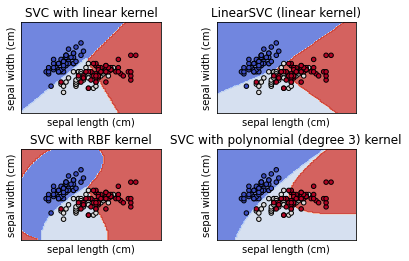

In [13]:
from sklearn import svm, datasets

# Take the first two features. We could avoid this by using a two-dim dataset
x = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(x, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x0, x1 = x[:, 0], x[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# **Ex 5:**

train size = (90, 2)
test size = (10, 2)


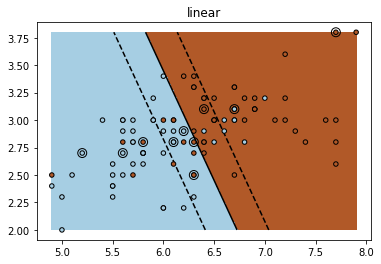

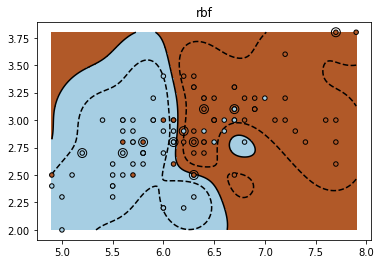

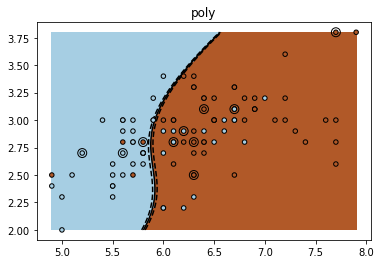

In [18]:
x = iris.data
y = iris.target

x = x[y != 0, :2]
y = y[y != 0]

n_sample = len(x)

np.random.seed(0)
order = np.random.permutation(n_sample)
x = x[order]
y = y[order].astype(float)

x_train = x[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
x_test = x[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]
print(f"train size = {x_train.shape}")
print(f"test size = {x_test.shape}")
# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(x_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        x[:, 0], x[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        x_test[:, 0], x_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = x[:, 0].min()
    x_max = x[:, 0].max()
    y_min = x[:, 1].min()
    y_max = x[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

# **Ex 8 & 9:**

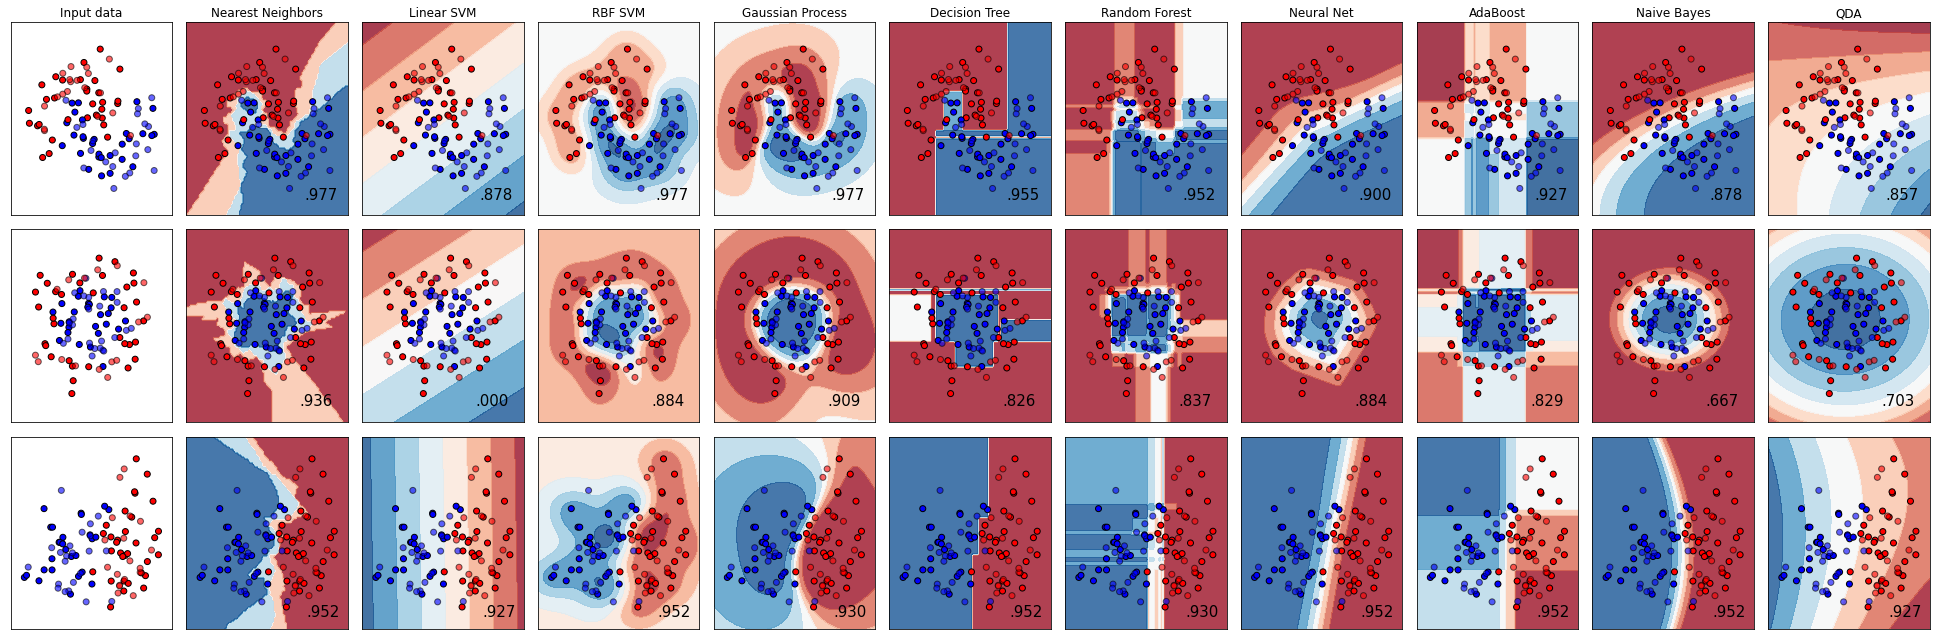

In [22]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import f1_score
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = f1_score(y_test, y_pred, average='binary')
        # score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.3f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

# **Ex 10:**

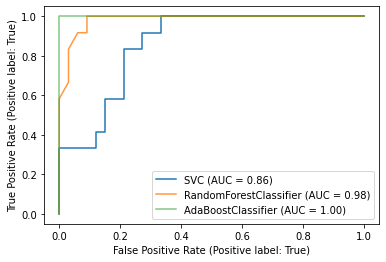

In [31]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
ax = plt.gca()
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
ada_disp = RocCurveDisplay.from_estimator(ada,  X_test, y_test , ax=ax, alpha=0.6)


plt.show()


# **Ex 12:**

Confusion matrix, without normalization  SVM
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Confusion matrix, without normalization  Random Forest
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Normalized confusion matrix  SVM
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]
Normalized confusion matrix  Random Forest
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


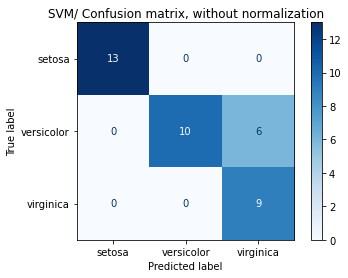

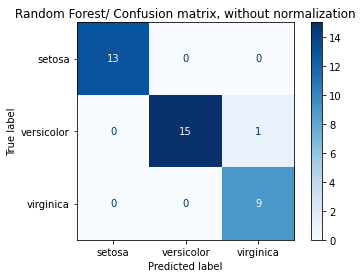

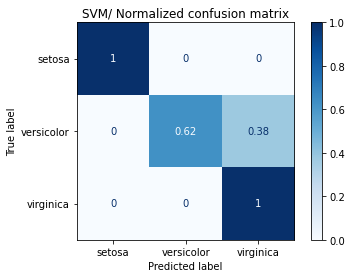

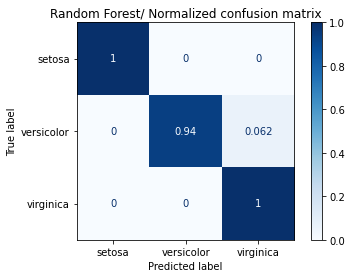

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier_svm = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)
classifier_rf =  RandomForestClassifier().fit(X_train, y_train)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier_svm,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title("SVM/ " +title)

    print(title, " SVM")
    print(disp.confusion_matrix)

    disp = ConfusionMatrixDisplay.from_estimator(
        classifier_rf,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title("Random Forest/ " + title)

    print(title, " Random Forest")
    print(disp.confusion_matrix)

plt.show()

# **Ex 13**

In [39]:
from sklearn import datasets

digits = datasets.load_digits()

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target == 8
print(
    f"The number of images is {X.shape[0]} and each image contains {X.shape[1]} pixels"
)
scores = ["precision", "recall"]
import pandas as pd

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.98

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

The number of images is 1797 and each image contains 64 pixels


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000], "degree" : [2, 3, 4]},
]

grid_search = GridSearchCV(
    SVC(), tuned_parameters, scoring=scores, refit=refit_strategy
)
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

All grid-search results:
precision: 1.000 (±0.000), recall: 0.854 (±0.063), for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
precision: 1.000 (±0.000), recall: 0.257 (±0.061), for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
precision: 1.000 (±0.000), recall: 0.877 (±0.069), for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
precision: 0.968 (±0.039), recall: 0.780 (±0.083), for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
precision: 1.000 (±0.000), recall: 0.877 (±0.069), for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
precision: 0.905 (±0.058), recall: 0.889 (±0.074), for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
precision: 1.000 (±0.000), recall: 0.877 (±0.069), for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
precision: 0.904 (±0.058), recall: 0.890 (±0.073), for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
precision: 0.695 (±0.073), recall: 0.743 (±0.065), for {'C': 1, 'kernel': 'linear'}
precision: 0.643 (±0.066), recall: 0.757 (±0.066), for {'C': 10, 'kernel': 'linear'}
precision: 0.6

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.001, 0.0001], 'kernel': ['poly']}],
             refit=<function refit_strategy at 0x7fbc9915ea60>,
             scoring=['precision', 'recall'])